In [1]:
import pandas as pd
import plotly.express as px
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading all the datasets

In [2]:
andhra_2014=pd.read_csv('/content/drive/My Drive/Constituency/Combined_Cluster_2014.csv')
andhra_2019=pd.read_csv('/content/drive/My Drive/Constituency/Combined_Cluster_2019.csv')
mpi_district=pd.read_csv('/content/drive/My Drive/Constituency/MPI_AP.csv')

#Basic Pre-Processing of the 2014 dataset

In [3]:
andhra_2014['Incumbent']=andhra_2014['Incumbent'].astype('int')
andhra_2014['Recontest']=andhra_2014['Recontest'].astype('int')
andhra_2014['Turncoat']=andhra_2014['Turncoat'].astype('int')
andhra_2014 = andhra_2014.replace({'Sex': {'M': 1, 'F': 0}})
andhra_2014['Party'] = andhra_2014['Party'].replace({'BJP': 'Third Parties', 'IND': 'Third Parties', 'NPT': 'Third Parties'})
party_dummies = pd.get_dummies(andhra_2014['Party'], prefix='Party')
andhra_2014 = pd.concat([andhra_2014, party_dummies], axis=1)
del andhra_2014['Party']

andhra_2014 = andhra_2014.replace({'Constituency_Type': {'GEN': 0, 'SC': 1,'ST':2}})
andhra_2014 = andhra_2014.replace({'Candidate_Type': {'GEN': 0, 'SC': 1,'ST':2}})
andhra_2014 = andhra_2014.replace({'Sub_Region': {'COASTAL ANDHRA': 0, 'RAYALA SEEMA': 1}})
del andhra_2014['Constituency_Type']
education_dummies = pd.get_dummies(andhra_2014['MyNeta_education'], prefix='Education')
andhra_2014 = pd.concat([andhra_2014, education_dummies], axis=1)

profession_dummies = pd.get_dummies(andhra_2014['TCPD_Prof_Main'], prefix='Profession')
andhra_2014 = pd.concat([andhra_2014, profession_dummies], axis=1)

del andhra_2014['MyNeta_education'],andhra_2014['TCPD_Prof_Main']

#Basic Pre-Processing of the 2019 dataset

In [4]:
andhra_2019['Incumbent']=andhra_2019['Incumbent'].astype('int')
andhra_2019['Recontest']=andhra_2019['Recontest'].astype('int')
andhra_2019['Turncoat']=andhra_2019['Turncoat'].astype('int')
andhra_2019 = andhra_2019.replace({'Sex': {'MAL': 1, 'FEM': 0}})
andhra_2019['Party'] = andhra_2019['Party'].replace({'BJP': 'Third Parties', 'IND': 'Third Parties', 'NPT': 'Third Parties'})
party_dummies = pd.get_dummies(andhra_2019['Party'], prefix='Party')
andhra_2019 = pd.concat([andhra_2019, party_dummies], axis=1)
del andhra_2019['Party']

andhra_2019 = andhra_2019.replace({'Constituency_Type': {'GENER': 0, 'SC': 1,'ST':2}})
andhra_2019 = andhra_2019.replace({'Candidate_Type': {'GENER': 0, 'SC': 1,'ST':2}})
andhra_2019 = andhra_2019.replace({'Sub_Region': {'COASTAL ANDHRA': 0, 'RAYALA SEEMA': 1}})
del andhra_2019['Constituency_Type']
education_dummies = pd.get_dummies(andhra_2019['MyNeta_education'], prefix='Education')
andhra_2019 = pd.concat([andhra_2019, education_dummies], axis=1)

profession_dummies = pd.get_dummies(andhra_2019['TCPD_Prof_Main'], prefix='Profession')
andhra_2019 = pd.concat([andhra_2019, profession_dummies], axis=1)

del andhra_2019['MyNeta_education'],andhra_2019['TCPD_Prof_Main']

In [5]:
andhra_2014

,Unnamed: 0,Candidate,Sex,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Sub_Region,N_Cand,...,Profession_Education,Profession_Former Government,Profession_Liberal Profession or Professional,Profession_Other or Unspecified,Profession_Politics,Profession_Retired or Pension,Profession_Salaried Work or Employed,Profession_Small Business or Self-employed,Profession_Social Work,Profession_Student
0,22313,ASHOK BENDALAM,1,86815,0,160919,224989,ichchapuram,0,9,...,0,0,0,0,0,0,0,0,0,0
1,22323,GOUTHU SYAM SUNDER SIVAJI,1,69658,0,137294,190925,palasa,0,11,...,0,0,0,0,0,0,0,0,1,0
2,22335,ATCHANNAIDU KINJARAPU,1,81167,0,160394,205744,tekkali,0,6,...,0,0,0,0,0,0,0,0,0,0
3,22342,KALAMATA VENKATA RAMANA MURTHY,1,69320,0,141038,193789,pathapatnam,0,6,...,0,0,0,0,0,0,0,0,0,0
4,22349,GUNDA LAKSHMI DEVI,0,88814,0,164523,228112,srikakulam,0,12,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,24693,NARAYANASWAMY,1,84538,1,155623,184535,gangadhara nellore,1,13,...,0,0,0,0,0,0,0,0,0,0
171,24707,D. A. SATHYA PRABHA,0,73430,0,145409,192535,chittoor,1,15,...,0,0,0,1,0,0,0,0,0,0
172,24723,M. SUNIL KUMAR,1,83200,1,170651,200372,puthalapattu,1,6,...,0,0,0,0,0,1,0,0,0,0
173,24730,N.AMARANATH REDDY,1,96541,0,197579,234070,palamaner,1,8,...,0,0,0,0,0,0,0,0,0,0


In [6]:
andhra_2019

,Unnamed: 0,Candidate,Sex,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Sub_Region,N_Cand,...,Profession_Education,Profession_Former Government,Profession_Labourer or Daily Wage,Profession_Liberal Profession or Professional,Profession_Other or Unspecified,Profession_Politics,Profession_Retired or Pension,Profession_Salaried Work or Employed,Profession_Small Business or Self-employed,Profession_Social Work
0,24747,ASHOK BENDALAM,1,79992,0,172423,247941,ichchapuram,0,7,...,0,0,0,1,0,0,0,0,0,0
1,24754,APPALARAJU SEEDIRI,1,76603,0,150691,206799,palasa,0,10,...,0,0,0,1,0,0,0,0,0,0
2,24764,ATCHANNAIDU KINJARAPU,1,87658,0,176583,224852,tekkali,0,9,...,0,0,0,0,0,1,0,0,0,0
3,24773,REDDY SHANTHI,0,76941,0,152599,217897,pathapatnam,0,9,...,0,0,0,0,0,0,0,0,0,0
4,24782,DHARMANA PRASADA RAO,1,84084,0,177297,256243,srikakulam,0,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,26984,K. NARAYANA SWAMY,1,103038,1,172673,199874,gangadhara nellore,1,12,...,0,0,0,0,0,0,0,0,0,0
171,26996,Aranii Srenevasulu (Jangalapalli),1,91206,0,151550,193904,chittoor,1,12,...,0,0,0,0,0,0,0,0,0,0
172,27008,M. BABU,1,103265,1,186918,216240,puthalapattu,1,11,...,0,0,0,0,0,0,0,0,0,0
173,27019,N VENKATE GOWDA,1,119241,0,218957,256090,palamaner,1,11,...,0,0,0,0,0,0,0,0,0,0


#Aggregating the Data at District level


In [7]:
# Merge with ENOP, Turnout Percentage, and Margin for correlation analysis
district_data_2014 = andhra_2014.groupby("District_Name").agg({
    "ENOP": "mean",
    "Turnout_Percentage": "mean",
    "Margin": "mean",
    "Vote_Share_Percentage":"mean",
    "Contested":"mean",
    'Age':'mean',
    'Party_TDP':'mean',
    'Party_YSRCP':'mean',
'Education_10th Pass':'mean',
'Education_12th Pass':'mean',
'Education_5th Pass':'mean',
'Education_8th Pass':'mean',
'Education_Doctorate':'mean',
 'Education_Graduate':'mean',
'Education_Graduate Professional':'mean',
'Education_Literate':'mean',
'Education_Others':'mean',
'Education_Post Graduate':'mean',
'Profession_Agriculture':'mean',
'Profession_Business':'mean',
'Profession_Education':'mean',
'Profession_Former Government':'mean',
'Profession_Liberal Profession or Professional':'mean',
'Profession_Other or Unspecified':'mean',
 'Profession_Politics':'mean',
'Profession_Retired or Pension':'mean',
 'Profession_Salaried Work or Employed':'mean',
'Profession_Small Business or Self-employed':'mean',
 'Profession_Social Work':'mean',
'Profession_Student':'mean'


})


In [8]:
district_data_2014 = pd.merge(district_data_2014,mpi_district[['District_Name','Index_2014']],on='District_Name',how='inner')

#Aggregating the Data at District level 2014, and variables correlated

In [9]:


district_data_2019 = andhra_2019.groupby("District_Name").agg({
    "ENOP": "mean",
    "Turnout_Percentage": "mean",
    "Margin": "mean",
    "Vote_Share_Percentage":"mean",
    "Contested":"mean",
    'Age':'mean',
    'Party_TDP':'mean',
    'Party_YSRCP':'mean',

'Education_10th Pass':'mean',
'Education_12th Pass':'mean',
'Education_5th Pass':'mean',
'Education_8th Pass':'mean',
'Education_Doctorate':'mean',
 'Education_Graduate':'mean',
'Education_Graduate Professional':'mean',
'Education_Literate':'mean',
'Education_Others':'mean',
'Education_Post Graduate':'mean',
'Profession_Agriculture':'mean',
'Profession_Business':'mean',
'Profession_Education':'mean',
'Profession_Former Government':'mean',
'Profession_Liberal Profession or Professional':'mean',
'Profession_Other or Unspecified':'mean',
 'Profession_Politics':'mean',
'Profession_Retired or Pension':'mean',
 'Profession_Salaried Work or Employed':'mean',
'Profession_Small Business or Self-employed':'mean',
 'Profession_Social Work':'mean',

})
district_data_2019 = pd.merge(district_data_2019,mpi_district[['District_Name','Index_2019','Index Political Difference']],on='District_Name',how='inner')

# Compute correlations for 2014 and 2019
correlations_2014 = district_data_2014.corr()["Index_2014"].drop("Index_2014")
correlations_2019 = district_data_2019.corr()["Index_2019"].drop("Index_2019")

correlations_2014[(correlations_2014>0.3)|(correlations_2014<-0.3)]

<ipython-input-9-144397ad3041>:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_2014 = district_data_2014.corr()["Index_2014"].drop("Index_2014")
<ipython-input-9-144397ad3041>:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_2019 = district_data_2019.corr()["Index_2019"].drop("Index_2019")


ENOP                                         -0.771960
Vote_Share_Percentage                         0.599023
Contested                                     0.623496
Age                                           0.396335
Education_Graduate Professional              -0.368560
Education_Post Graduate                       0.388426
Profession_Small Business or Self-employed   -0.548045
Profession_Social Work                        0.460504
Name: Index_2014, dtype: float64

#Aggregating the Data at District level 2019, and variables correlated

In [10]:
correlations_2019[(correlations_2019>0.3)|(correlations_2019<-0.3)]

Margin                                  0.639823
Vote_Share_Percentage                   0.500273
Contested                              -0.421975
Party_TDP                              -0.358846
Party_YSRCP                             0.376814
Profession_Business                    -0.469037
Profession_Politics                     0.376972
Profession_Salaried Work or Employed    0.642419
Profession_Social Work                 -0.313558
Index Political Difference              0.823227
Name: Index_2019, dtype: float64

In [11]:
district_data = pd.merge(district_data_2014,district_data_2019,on='District_Name',how='inner')

#Calculating Difference between 2014 and 2019

In [12]:
columns_to_subtract = ['ENOP',
'Turnout_Percentage',
'Margin',
'Vote_Share_Percentage',
'Contested',
'Age',
'Party_TDP',
'Party_YSRCP',
'Education_10th Pass',
'Education_12th Pass',
'Education_5th Pass',
'Education_8th Pass',
'Education_Doctorate',
 'Education_Graduate',
'Education_Graduate Professional',
'Education_Literate',
'Education_Others',
'Education_Post Graduate',
'Profession_Agriculture',
'Profession_Business',
'Profession_Education',
'Profession_Former Government',
'Profession_Liberal Profession or Professional',
'Profession_Other or Unspecified',
 'Profession_Politics',
'Profession_Retired or Pension',
 'Profession_Salaried Work or Employed',
'Profession_Small Business or Self-employed',
 'Profession_Social Work']
for i in columns_to_subtract:
  district_data['{}_diff'.format(i)] = district_data['{}_x'.format(i)] - district_data['{}_y'.format(i)]
  del district_data['{}_x'.format(i)],district_data['{}_y'.format(i)]
correlations = district_data.corr()["Index Political Difference"].drop(["Index Political Difference","Index_2014","Index_2019"])

<ipython-input-12-a27dac48ea54>:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = district_data.corr()["Index Political Difference"].drop(["Index Political Difference","Index_2014","Index_2019"])


#Correlations which are significant for the Index Difference

<Axes: >

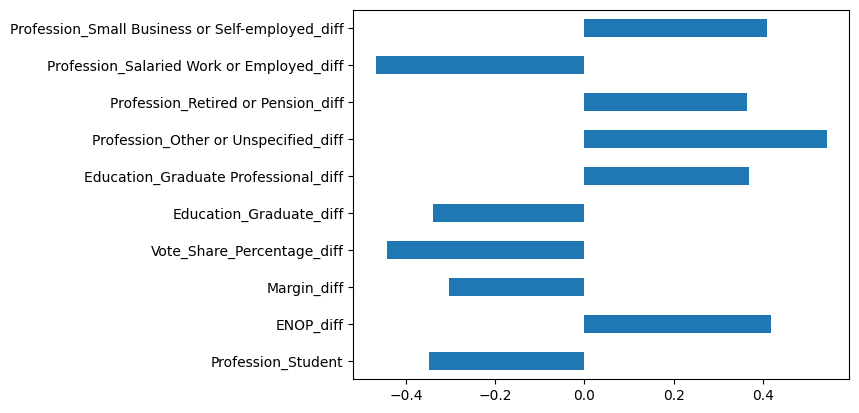

In [13]:
correlations[(correlations>0.3)|(correlations<-0.3)].plot(kind='barh')

In [ ]:
andhra_2014 = andhra_2014.add_suffix('_2014')
andhra_2014

,Unnamed: 0_2014,Candidate_2014,Sex_2014,Votes_2014,Candidate_Type_2014,Valid_Votes_2014,Electors_2014,Constituency_Name_2014,Sub_Region_2014,N_Cand_2014,...,Profession_Education_2014,Profession_Former Government_2014,Profession_Liberal Profession or Professional_2014,Profession_Other or Unspecified_2014,Profession_Politics_2014,Profession_Retired or Pension_2014,Profession_Salaried Work or Employed_2014,Profession_Small Business or Self-employed_2014,Profession_Social Work_2014,Profession_Student_2014
0,22313,ASHOK BENDALAM,1,86815,0,160919,224989,ichchapuram,0,9,...,0,0,0,0,0,0,0,0,0,0
1,22323,GOUTHU SYAM SUNDER SIVAJI,1,69658,0,137294,190925,palasa,0,11,...,0,0,0,0,0,0,0,0,1,0
2,22335,ATCHANNAIDU KINJARAPU,1,81167,0,160394,205744,tekkali,0,6,...,0,0,0,0,0,0,0,0,0,0
3,22342,KALAMATA VENKATA RAMANA MURTHY,1,69320,0,141038,193789,pathapatnam,0,6,...,0,0,0,0,0,0,0,0,0,0
4,22349,GUNDA LAKSHMI DEVI,0,88814,0,164523,228112,srikakulam,0,12,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,24693,NARAYANASWAMY,1,84538,1,155623,184535,gangadhara nellore,1,13,...,0,0,0,0,0,0,0,0,0,0
171,24707,D. A. SATHYA PRABHA,0,73430,0,145409,192535,chittoor,1,15,...,0,0,0,1,0,0,0,0,0,0
172,24723,M. SUNIL KUMAR,1,83200,1,170651,200372,puthalapattu,1,6,...,0,0,0,0,0,1,0,0,0,0
173,24730,N.AMARANATH REDDY,1,96541,0,197579,234070,palamaner,1,8,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
andhra_2019 = andhra_2019.add_suffix('_2019')
andhra_2019

,Unnamed: 0_2019,Candidate_2019,Sex_2019,Votes_2019,Candidate_Type_2019,Valid_Votes_2019,Electors_2019,Constituency_Name_2019,Sub_Region_2019,N_Cand_2019,...,Profession_Education_2019,Profession_Former Government_2019,Profession_Labourer or Daily Wage_2019,Profession_Liberal Profession or Professional_2019,Profession_Other or Unspecified_2019,Profession_Politics_2019,Profession_Retired or Pension_2019,Profession_Salaried Work or Employed_2019,Profession_Small Business or Self-employed_2019,Profession_Social Work_2019
0,24747,ASHOK BENDALAM,1,79992,0,172423,247941,ichchapuram,0,7,...,0,0,0,1,0,0,0,0,0,0
1,24754,APPALARAJU SEEDIRI,1,76603,0,150691,206799,palasa,0,10,...,0,0,0,1,0,0,0,0,0,0
2,24764,ATCHANNAIDU KINJARAPU,1,87658,0,176583,224852,tekkali,0,9,...,0,0,0,0,0,1,0,0,0,0
3,24773,REDDY SHANTHI,0,76941,0,152599,217897,pathapatnam,0,9,...,0,0,0,0,0,0,0,0,0,0
4,24782,DHARMANA PRASADA RAO,1,84084,0,177297,256243,srikakulam,0,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,26984,K. NARAYANA SWAMY,1,103038,1,172673,199874,gangadhara nellore,1,12,...,0,0,0,0,0,0,0,0,0,0
171,26996,Aranii Srenevasulu (Jangalapalli),1,91206,0,151550,193904,chittoor,1,12,...,0,0,0,0,0,0,0,0,0,0
172,27008,M. BABU,1,103265,1,186918,216240,puthalapattu,1,11,...,0,0,0,0,0,0,0,0,0,0
173,27019,N VENKATE GOWDA,1,119241,0,218957,256090,palamaner,1,11,...,0,0,0,0,0,0,0,0,0,0


#Differentiating Places of high change and Low Change

In [ ]:
andhra = pd.merge(andhra_2014,andhra_2019,left_on=['District_Name_2014','Constituency_Name_2014'],right_on=['District_Name_2019','Constituency_Name_2019'],how='inner')
andhra = pd.merge(andhra,mpi_district,left_on='District_Name_2019',right_on='District_Name',how='inner')
no_change_constituency = andhra[andhra['Index_2014']==andhra['Index_2019']]
change_constituency = andhra[andhra['Index_2014']!=andhra['Index_2019']]

In [ ]:
change_constituency

,Unnamed: 0_2014,Candidate_2014,Sex_2014,Votes_2014,Candidate_Type_2014,Valid_Votes_2014,Electors_2014,Constituency_Name_2014,Sub_Region_2014,N_Cand_2014,...,District,Headcount Ratio (NFHS-4),Intensity (NFHS-4),MPI (NFHS-4),Headcount Ratio (NFHS-5),Intensity (NFHS-5),MPI (NFHS-5),MPI Index DIfference,Head Count Index Difference,Intensity (NFHS-4) Difference
10,22407,PAMULA PUSHPA SREEVANI,0,55435,2,133254,176271,kurupam,0,8,...,vizianagaram,0.1900,0.4242,0.081,0.0866,0.402,0.035,-0.046,-0.1034,-0.0222
11,22416,BOBBILI CHIRANJEEVULU,1,62458,1,130278,173905,parvathipuram,0,8,...,vizianagaram,0.1900,0.4242,0.081,0.0866,0.402,0.035,-0.046,-0.1034,-0.0222
12,22425,RAJANNA DORA PEEDIKA,1,63755,2,134857,175174,salur,0,6,...,vizianagaram,0.1900,0.4242,0.081,0.0866,0.402,0.035,-0.046,-0.1034,-0.0222
13,22432,VENKATA SUJAY KRISHNA RANGA RAO RAVU,1,83587,0,168281,211986,bobbili,0,6,...,vizianagaram,0.1900,0.4242,0.081,0.0866,0.402,0.035,-0.046,-0.1034,-0.0222
14,22439,KIMIDI MRUNALINI,0,63787,0,154055,189401,cheepurupalle,0,11,...,vizianagaram,0.1900,0.4242,0.081,0.0866,0.402,0.035,-0.046,-0.1034,-0.0222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,24693,NARAYANASWAMY,1,84538,1,155623,184535,gangadhara nellore,1,13,...,chittoor,0.0964,0.4265,0.041,0.0566,0.392,0.022,-0.019,-0.0398,-0.0345
171,24707,D. A. SATHYA PRABHA,0,73430,0,145409,192535,chittoor,1,15,...,chittoor,0.0964,0.4265,0.041,0.0566,0.392,0.022,-0.019,-0.0398,-0.0345
172,24723,M. SUNIL KUMAR,1,83200,1,170651,200372,puthalapattu,1,6,...,chittoor,0.0964,0.4265,0.041,0.0566,0.392,0.022,-0.019,-0.0398,-0.0345
173,24730,N.AMARANATH REDDY,1,96541,0,197579,234070,palamaner,1,8,...,chittoor,0.0964,0.4265,0.041,0.0566,0.392,0.022,-0.019,-0.0398,-0.0345


In [ ]:
no_change_constituency

,Unnamed: 0_2014,Candidate_2014,Sex_2014,Votes_2014,Candidate_Type_2014,Valid_Votes_2014,Electors_2014,Constituency_Name_2014,Sub_Region_2014,N_Cand_2014,...,District,Headcount Ratio (NFHS-4),Intensity (NFHS-4),MPI (NFHS-4),Headcount Ratio (NFHS-5),Intensity (NFHS-5),MPI (NFHS-5),MPI Index DIfference,Head Count Index Difference,Intensity (NFHS-4) Difference
0,22313,ASHOK BENDALAM,1,86815,0,160919,224989,ichchapuram,0,9,...,srikakulam,0.1401,0.4156,0.058,0.0520,0.4183,0.022,-0.036,-0.0881,0.0027
1,22323,GOUTHU SYAM SUNDER SIVAJI,1,69658,0,137294,190925,palasa,0,11,...,srikakulam,0.1401,0.4156,0.058,0.0520,0.4183,0.022,-0.036,-0.0881,0.0027
2,22335,ATCHANNAIDU KINJARAPU,1,81167,0,160394,205744,tekkali,0,6,...,srikakulam,0.1401,0.4156,0.058,0.0520,0.4183,0.022,-0.036,-0.0881,0.0027
3,22342,KALAMATA VENKATA RAMANA MURTHY,1,69320,0,141038,193789,pathapatnam,0,6,...,srikakulam,0.1401,0.4156,0.058,0.0520,0.4183,0.022,-0.036,-0.0881,0.0027
4,22349,GUNDA LAKSHMI DEVI,0,88814,0,164523,228112,srikakulam,0,12,...,srikakulam,0.1401,0.4156,0.058,0.0520,0.4183,0.022,-0.036,-0.0881,0.0027
5,22362,KOONA RAVIKUMAR,1,65233,0,134111,173788,amadalavalasa,0,9,...,srikakulam,0.1401,0.4156,0.058,0.0520,0.4183,0.022,-0.036,-0.0881,0.0027
6,22372,KALAVENKATARAO KIMIDI,1,85769,0,174001,210400,etcherla,0,8,...,srikakulam,0.1401,0.4156,0.058,0.0520,0.4183,0.022,-0.036,-0.0881,0.0027
7,22381,RAMANAMURTY BAGGU,1,76559,0,155156,196379,narasannapeta,0,7,...,srikakulam,0.1401,0.4156,0.058,0.0520,0.4183,0.022,-0.036,-0.0881,0.0027
8,22389,KAMBALA JOGULU,1,69192,1,147887,199349,rajam,0,9,...,srikakulam,0.1401,0.4156,0.058,0.0520,0.4183,0.022,-0.036,-0.0881,0.0027
9,22399,VISWASARAYI KALAVATHI,0,55337,2,121428,168256,palakonda,0,7,...,srikakulam,0.1401,0.4156,0.058,0.0520,0.4183,0.022,-0.036,-0.0881,0.0027


In [ ]:
import numpy as np

#Turnout Percentage Difference

In [ ]:
k='Turnout_Percentage'
(len(change_constituency[abs(change_constituency['{}_2014'.format(k)]-change_constituency['{}_2019'.format(k)])>5])/len(change_constituency))*100

7.751937984496124

In [ ]:
k='Turnout_Percentage'
(len(no_change_constituency[abs(no_change_constituency['{}_2014'.format(k)]-no_change_constituency['{}_2019'.format(k)])>5])/len(no_change_constituency))*100

0.0

#Vote Share Percentage Difference

In [ ]:
k='Vote_Share_Percentage'
(len(change_constituency[abs(change_constituency['{}_2014'.format(k)]-change_constituency['{}_2019'.format(k)])>5])/len(change_constituency))*100

53.48837209302325

In [ ]:
k='Vote_Share_Percentage'
(len(no_change_constituency[abs(no_change_constituency['{}_2014'.format(k)]-no_change_constituency['{}_2019'.format(k)])>5])/len(no_change_constituency))*100

34.78260869565217

#Margin Percentage

In [ ]:
k='Margin_Percentage'
(len(change_constituency[abs(change_constituency['{}_2014'.format(k)]-change_constituency['{}_2019'.format(k)])>10])/len(change_constituency))*100

44.96124031007752

In [ ]:
k='Margin_Percentage'
(len(no_change_constituency[abs(no_change_constituency['{}_2014'.format(k)]-no_change_constituency['{}_2019'.format(k)])>10])/len(no_change_constituency))*100

23.91304347826087

#Education Graduate

In [ ]:
k='Education_Graduate'
(len(change_constituency[abs(change_constituency['{}_2014'.format(k)]==change_constituency['{}_2019'.format(k)])])/len(change_constituency))*100

57.36434108527132

In [ ]:
k='Education_Graduate'
(len(no_change_constituency[abs(no_change_constituency['{}_2014'.format(k)]==no_change_constituency['{}_2019'.format(k)])])/len(no_change_constituency))*100

63.04347826086957

#Professional Unspecified

In [ ]:
k='Profession_Other or Unspecified'
(len(change_constituency[abs(change_constituency['{}_2014'.format(k)]==change_constituency['{}_2019'.format(k)])])/len(change_constituency))*100

96.89922480620154

In [ ]:
k='Profession_Other or Unspecified'
(len(no_change_constituency[abs(no_change_constituency['{}_2014'.format(k)]==no_change_constituency['{}_2019'.format(k)])])/len(no_change_constituency))*100

89.13043478260869

#Party TDP

In [ ]:
k='Party_TDP'
(len(change_constituency[abs(change_constituency['{}_2014'.format(k)]==change_constituency['{}_2019'.format(k)])])/len(change_constituency))*100

50.3875968992248

In [ ]:
k='Party_TDP'
(len(no_change_constituency[abs(no_change_constituency['{}_2014'.format(k)]==no_change_constituency['{}_2019'.format(k)])])/len(no_change_constituency))*100

45.65217391304348

#Party YSRCP

In [ ]:
k='Party_YSRCP'
(len(change_constituency[abs(change_constituency['{}_2014'.format(k)]==change_constituency['{}_2019'.format(k)])])/len(change_constituency))*100

50.3875968992248

In [ ]:
k='Party_YSRCP'
(len(no_change_constituency[abs(no_change_constituency['{}_2014'.format(k)]==no_change_constituency['{}_2019'.format(k)])])/len(no_change_constituency))*100

47.82608695652174

#Party-Wise Histograms

<Axes: ylabel='Frequency'>

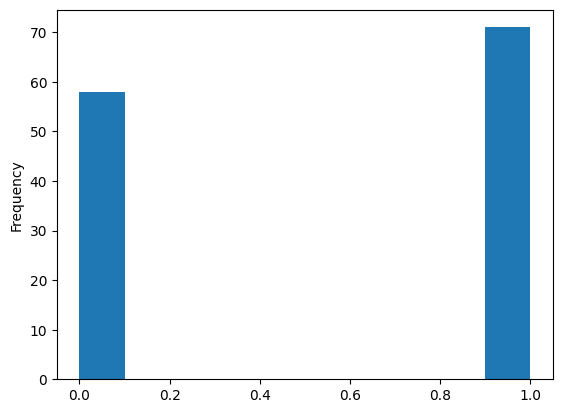

In [ ]:
change_constituency['Party_TDP_2014'].plot(kind='hist')

<Axes: ylabel='Frequency'>

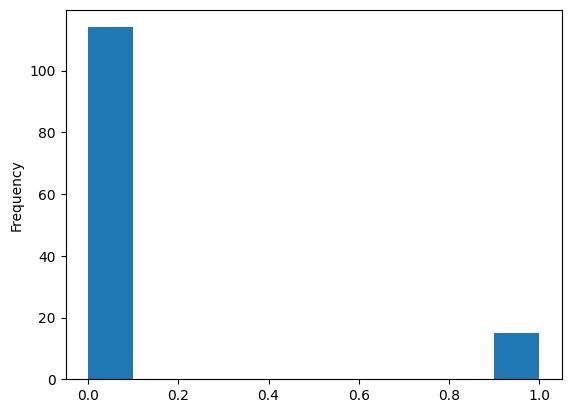

In [ ]:
change_constituency['Party_TDP_2019'].plot(kind='hist')

<Axes: ylabel='Frequency'>

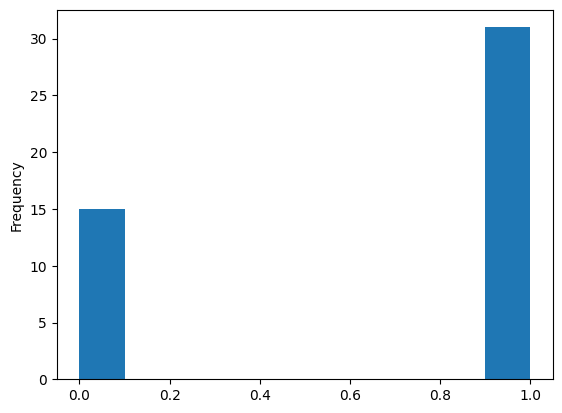

In [ ]:
no_change_constituency['Party_TDP_2014'].plot(kind='hist')

<Axes: ylabel='Frequency'>

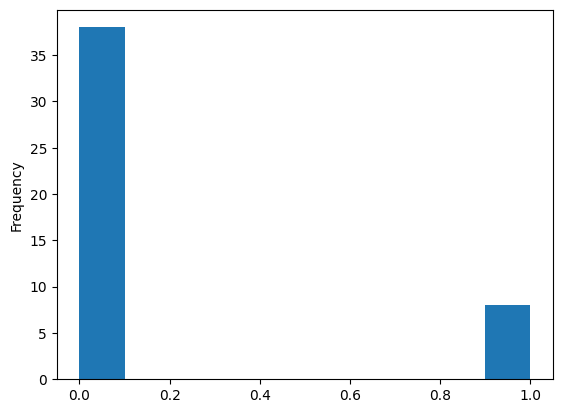

In [ ]:
no_change_constituency['Party_TDP_2019'].plot(kind='hist')

#Party-Wise Turnout Percentage

In [ ]:
px.scatter(andhra,y=andhra['Turnout_Percentage_2014']-andhra['Turnout_Percentage_2019'],x='Turnout_Percentage_2019',color='Party_TDP_2019')

#Party-Wise ENOP

In [ ]:
px.scatter(andhra,y=andhra['ENOP_2014']-andhra['ENOP_2019'],x='ENOP_2019',color='Party_TDP_2019')

#Party-Wise Margin Percentage

In [ ]:
px.scatter(andhra,x=andhra['Margin_Percentage_2019']-andhra['Margin_Percentage_2014'],y='Margin_Percentage_2019',color='Party_TDP_2019')

#Constituencies with anamoly Behavior

50


<Axes: xlabel='Margin_Percentage_2019', ylabel='Margin_Percentage_2014'>

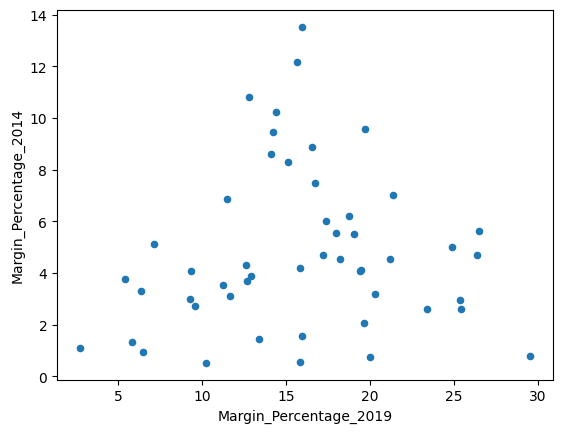

In [ ]:
print(len(andhra[(andhra['Margin_Percentage_2019']>andhra['Margin_Percentage_2014'])&(andhra['Party_YSRCP_2019']==1)&(andhra['Party_TDP_2014']==1)]))
andhra[(andhra['Margin_Percentage_2019']>andhra['Margin_Percentage_2014'])&(andhra['Party_YSRCP_2019']==1)&(andhra['Party_TDP_2014']==1)][['Margin_Percentage_2014','Margin_Percentage_2019']].plot(kind='scatter',x='Margin_Percentage_2019',y='Margin_Percentage_2014')

58


<Axes: xlabel='Margin_Percentage_2019', ylabel='Margin_Percentage_2014'>

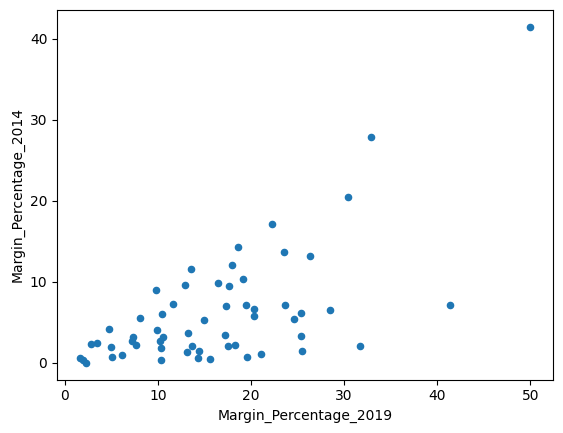

In [ ]:
print(len(andhra[(andhra['Margin_Percentage_2019']>andhra['Margin_Percentage_2014'])&(andhra['Party_YSRCP_2019']==1)&(andhra['Party_TDP_2014']==0)]))
andhra[(andhra['Margin_Percentage_2019']>andhra['Margin_Percentage_2014'])&(andhra['Party_YSRCP_2019']==1)&(andhra['Party_TDP_2014']==0)][['Margin_Percentage_2014','Margin_Percentage_2019']].plot(kind='scatter',x='Margin_Percentage_2019',y='Margin_Percentage_2014')

22


<Axes: xlabel='ENOP_2019', ylabel='ENOP_2014'>

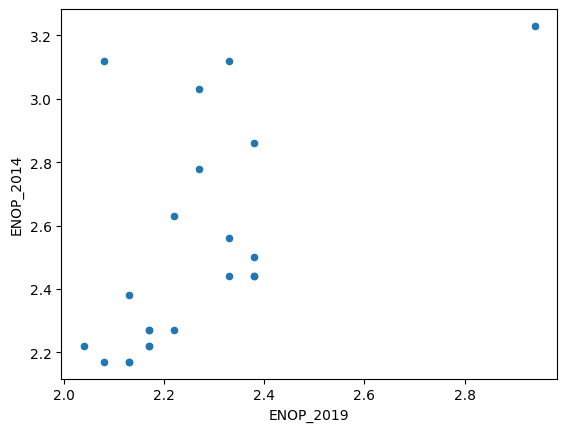

In [ ]:
print(len(andhra[(andhra['ENOP_2014']>andhra['ENOP_2019'])&(andhra['Party_YSRCP_2019']==1)&(andhra['Party_TDP_2014']==1)][['ENOP_2014','ENOP_2019']]))
andhra[(andhra['ENOP_2014']>andhra['ENOP_2019'])&(andhra['Party_YSRCP_2019']==1)&(andhra['Party_TDP_2014']==1)][['ENOP_2014','ENOP_2019']].plot(kind='scatter',x='ENOP_2019',y='ENOP_2014')

53


<Axes: xlabel='ENOP_2019', ylabel='ENOP_2014'>

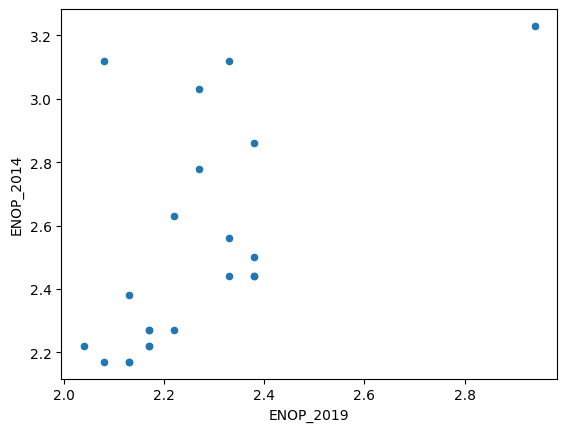

In [ ]:
print(len(andhra[(andhra['ENOP_2014']<andhra['ENOP_2019'])&(andhra['Party_YSRCP_2019']==1)&(andhra['Party_TDP_2014']==1)][['ENOP_2014','ENOP_2019']]))
andhra[(andhra['ENOP_2014']>andhra['ENOP_2019'])&(andhra['Party_YSRCP_2019']==1)&(andhra['Party_TDP_2014']==1)][['ENOP_2014','ENOP_2019']].plot(kind='scatter',x='ENOP_2019',y='ENOP_2014')